<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear com dados de aluguéis de bicicletas em Londres

> Dataset: [London bike sharing datase](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset)
<br>
> Período: 2015 - 2017

## 1. Leitura dos dados e análise preliminar

### 1.1 Colunas do dataset

*   *timestamp* - Horário do aluguel
*   *cnt* - Quantidade de bicicletas alugadas
*   *t1* - Temperatura real
*   *t2* - Sensação térmica
*   *hum* - Humidade do ar
*   *wind_speed* - Velocidade do vento
*   *weather_code* - Aparência do tempo
*   *is_holiday* - Feriado
*   *is_weekend* - Final de semana
*   *season* - Estação do ano

### 1.2 Leitura dos dados

In [78]:
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
data = pd.read_csv('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_5/londres_alugueis_bicicleta.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 1.3 Análise preliminar dos dados

#### Quantidade dos alugueis por horário

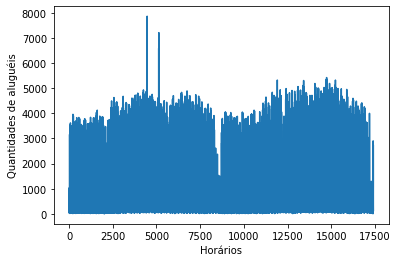

In [35]:
plt.plot(data.cnt)
plt.title('Quantidade de aluguéis por horário')
plt.xlabel('Horários')
plt.ylabel('Quantidade de aluguéis')
plt.show()

#### Distribuição de probabilidades para o aluguel de bicicletas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


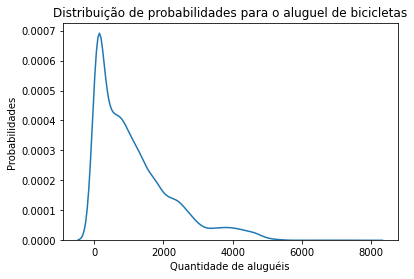

In [48]:
sns.distplot(data.cnt, hist=False, rug=False)
plt.title('Distribuição de probabilidades para o aluguel de bicicletas')
plt.xlabel('Quantidade de aluguéis')
plt.ylabel('Probabilidades')
plt.show()

#### Frequência média por estação do ano


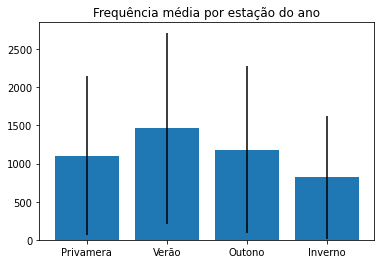

In [49]:
plt.title('Frequência média por estação do ano')
indice = ['Privamera', 'Verão','Outono','Inverno']
stats = data.groupby(['season'], as_index=False)['cnt'].agg(['mean', 'std'])
plt.bar(indice, stats['mean'], yerr=stats['std'])
plt.show()

#### Correlação entre a sensação térmica e a quantidade de aluguéis

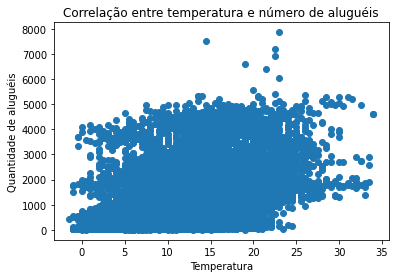

In [50]:
plt.title('Correlação entre a sensação térmica e a quantidade de aluguéis')
plt.scatter(data.t2, data.cnt)
plt.xlabel('Temperatura')
plt.ylabel('Quantidade de aluguéis')
plt.show()

#### Correlação entre a velocidade do vento e a quantidade de aluguéis

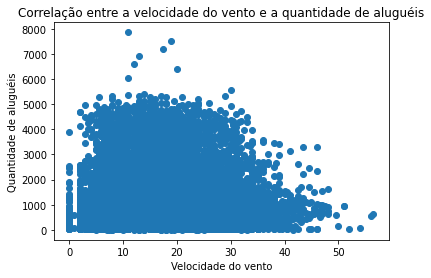

In [51]:
plt.title('Correlação entre a velocidade do vento e a quantidade de aluguéis')
plt.scatter(data.wind_speed, data.cnt)
plt.xlabel('Velocidade do vento')
plt.ylabel('Quantidade de aluguéis')
plt.show()

#### Coeficiente de correlação com *heatmap*

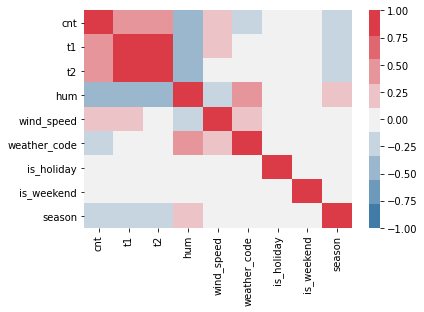

In [63]:
result = data.corr()
sns.heatmap(result, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(240, 10, n=9))
plt.show()

## 2. Limpeza, re-escala dos dados e organização para modelagem

### 2.1 Limpeza e remoção da coluna 'timestamp'

In [66]:
data = data.dropna()
data = data.drop(columns = ['timestamp'])
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 2.2 Re-escala dos dados usando máximo e mínimo

In [67]:
data = (data - data.min()) / (data.max() - data.min())
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0.023155,0.126761,0.2000,0.911950,0.106195,0.08,0.0,1.0,1.0
1,0.017557,0.126761,0.2125,0.911950,0.088496,0.00,0.0,1.0,1.0
2,0.017048,0.112676,0.2125,0.955975,0.000000,0.00,0.0,1.0,1.0
3,0.009160,0.098592,0.2000,1.000000,0.000000,0.00,0.0,1.0,1.0
4,0.005980,0.098592,0.1500,0.911950,0.115044,0.00,0.0,1.0,1.0


### 2.3 Organização dos dados para modelagem

#### 2.3.1 Atributos de classe ('cnt'):

In [68]:
y = data.cnt
y.head()

0    0.023155
1    0.017557
2    0.017048
3    0.009160
4    0.005980
Name: cnt, dtype: float64

#### 2.3.2 Atributos descritores

In [69]:
x = data.drop(columns=['cnt'])
x.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0.126761,0.2000,0.911950,0.106195,0.08,0.0,1.0,1.0
1,0.126761,0.2125,0.911950,0.088496,0.00,0.0,1.0,1.0
2,0.112676,0.2125,0.955975,0.000000,0.00,0.0,1.0,1.0
3,0.098592,0.2000,1.000000,0.000000,0.00,0.0,1.0,1.0
4,0.098592,0.1500,0.911950,0.115044,0.00,0.0,1.0,1.0


## 3. Treinamento, previsão e avaliação

### 3.1 Treinamento

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2)

### 3.2 Previsão

#### 3.2.1 Regressão linear

In [76]:
lnr_rgs = LinearRegression()
lnr_rgs.fit(x_train, y_train)
prd_lnr = lnr_rgs.predict(x_test)

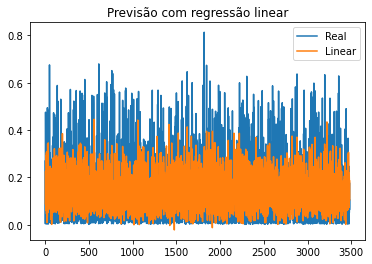

In [77]:
plt.title('Previsão com regressão linear')
plt.plot(y_test.reset_index(drop=True),label='Real')
plt.plot(prd_lnr, label='Linear')
plt.legend()
plt.show()

#### 3.2.2 Árvore de decisão

In [79]:
dcs_tr_rgs = DecisionTreeRegressor()
dcs_tr_rgs.fit(x_train, y_train)
prd_tr = dcs_tr_rgs.predict(x_test)

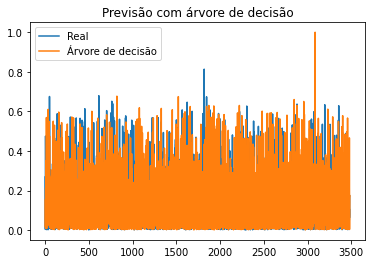

In [81]:
plt.title('Previsão com árvore de decisão')
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(prd_tr, label='Árvore de decisão')
plt.legend()
plt.show()

#### 3.2.3 *Random forest*

In [83]:
rnd_frt_rgs = RandomForestRegressor(n_estimators=100)
rnd_frt_rgs.fit(x_train, y_train)
prd_frt = rnd_frt_rgs.predict(x_test)

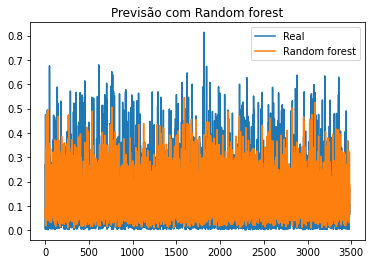

In [84]:
plt.title('Previsão com Random forest')
plt.plot(y_test.reset_index(drop=True), label='Real')
plt.plot(prd_frt, label='Random forest')
plt.legend()
plt.show()

#### 3.2.3 Rede neural *multi-layer perceptron* (MLP)

In [86]:
mlp_rgs = MLPRegressor(hidden_layer_sizes=(200,50), activation='logistic', max_iter=1000)
mlp_rgs.fit(x_train, y_train)
prd_mlp = mlp_rgs.predict(x_test)

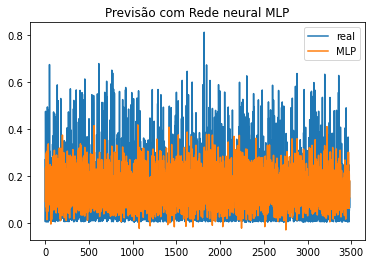

In [88]:
plt.title('Previsão com Rede neural MLP')
plt.plot(y_test.reset_index(drop=True), label='real')
plt.plot(prd_mlp, label='MLP')
plt.legend()
plt.show()

### 3.3 Avaliação do modelo

## 4. Considerações